# Task:  Movie Recommendation System Development
**Objective**:This project focuses on building a robust recommendation system using the MovieLens dataset to enhance personalized movie suggestions for users.

- The MovieLens dataset is a popular benchmark dataset for recommender systems, containing user ratings, movie metadata, and tags, designed to support research in collaborative filtering, content-based filtering, and hybrid recommendation algorithms.

In [2]:
#! pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505173 sha256=0dedbb93a44641850efd944c9ce0dadd471c920fdc4604aaec34f29ed7f6d209
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import GridSearchCV

# Requirement 1: Data Loading and Preprocessing
## Tasks:

- Load the MovieLens dataset and perform exploratory data analysis (EDA) to understand user preferences and movie features.
- Handle missing data through imputation or removal, ensuring the dataset is clean and ready for further analysis.
- This step includes merging necessary datasets and visualizing key insights to uncover patterns in ratings and movie popularity

In [4]:
# Load the datasets
movies = pd.read_csv("/content/drive/MyDrive/Sprints/Machine Learning/Capstone Project/Movie Recommendation System Development/Data/movies.csv")
tags = pd.read_csv("/content/drive/MyDrive/Sprints/Machine Learning/Capstone Project/Movie Recommendation System Development/Data/tags.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Sprints/Machine Learning/Capstone Project/Movie Recommendation System Development/Data/ratings.csv")
links = pd.read_csv("/content/drive/MyDrive/Sprints/Machine Learning/Capstone Project/Movie Recommendation System Development/Data/links.csv")

In [8]:
# Inspect datasets
print("Movies Dataset:")
display(movies.head())
print("\nTags Dataset:")
display(tags.head())
print("\nRatings Dataset:")
display(ratings.head())
print("\nLinks Dataset:")
display(links.head())

Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Tags Dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200



Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Links Dataset:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
# Info of data
print("Info of Movies:")
print(movies.info(), "\n")
print("Info of Tags:")
print(tags.info(), "\n")
print("Info of Ratings:")
print(ratings.info(), "\n")
print("Info of Links:")
print(links.info(), "\n")

Info of Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

Info of Tags:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB
None 

Info of Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Co

In [9]:
# Handle missing data
print("Missing Values in Movies:")
print(movies.isnull().sum(), "\n")
print("Missing Values in Tags:")
print(tags.isnull().sum(), "\n")
print("Missing Values in Ratings:")
print(ratings.isnull().sum(), "\n")
print("Missing Values in Links:")
print(links.isnull().sum(), "\n")

Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64 

Missing Values in Tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

Missing Values in Links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64 



In [10]:
links.dropna(inplace=True)

In [11]:
# Handle missing data
print("Missing Values in Movies:")
print(movies.isnull().sum(), "\n")
print("Missing Values in Tags:")
print(tags.isnull().sum(), "\n")
print("Missing Values in Ratings:")
print(ratings.isnull().sum(), "\n")
print("Missing Values in Links:")
print(links.isnull().sum(), "\n")

Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64 

Missing Values in Tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

Missing Values in Links:
movieId    0
imdbId     0
tmdbId     0
dtype: int64 



In [12]:
# Handle Duplicated data
print("Duplicated Values in Movies:")
print(movies.duplicated().sum(), "\n")
print("Duplicated Values in Tags:")
print(tags.duplicated().sum(), "\n")
print("Duplicated Values in Ratings:")
print(ratings.duplicated().sum(), "\n")
print("Duplicated Values in Links:")
print(links.duplicated().sum(), "\n")

Duplicated Values in Movies:
0 

Duplicated Values in Tags:
0 

Duplicated Values in Ratings:
0 

Duplicated Values in Links:
0 



In [13]:
# Convert timestamps to datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

In [17]:
# Info of data
print("Info of Movies:")
print(movies.info(), "\n")
print("Info of Tags:")
print(tags.info(), "\n")
print("Info of Ratings:")
print(ratings.info(), "\n")
print("Info of Links:")
print(links.info(), "\n")

Info of Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

Info of Tags:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB
None 

Info of Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Co

In [25]:
# Merge datasets
ratings_movies = pd.merge(ratings, movies, on='movieId', how='inner')
tags_movies = pd.merge(tags, movies, on='movieId', how='inner')
full_data = pd.merge(ratings_movies, tags_movies, on=['userId', 'movieId', 'title', 'genres'], how='outer')

print("Merged Datasets:")
print("Ratings and Movies:")
display(ratings_movies.head())

print("\nTags and Movies:")
display(tags_movies.head())

print("\nFull Data:")
display(full_data.head())

Merged Datasets:
Ratings and Movies:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller



Tags and Movies:


,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,2015-10-24 19:29:54,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,2015-10-24 19:29:56,Step Brothers (2008),Comedy
2,2,60756,will ferrell,2015-10-24 19:29:52,Step Brothers (2008),Comedy
3,2,89774,Boxing story,2015-10-24 19:33:27,Warrior (2011),Drama
4,2,89774,MMA,2015-10-24 19:33:20,Warrior (2011),Drama



Full Data:


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaT
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,NaN,NaT
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,NaN,NaT
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaT
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaT


In [26]:
# Info of data
print("Info of ratings_movies:")
print(ratings_movies.info(), "\n")
print("Info of tags_movies:")
print(tags_movies.info(), "\n")
print("Info of full_data:")
print(full_data.info(), "\n")

Info of ratings_movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB
None 

Info of tags_movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   

In [21]:
# Handle missing data
print("Missing Values in ratings_movies:")
print(ratings_movies.isnull().sum(), "\n")
print("Missing Values in tags_movies:")
print(tags_movies.isnull().sum(), "\n")
print("Missing Values in full_data:")
print(full_data.isnull().sum(), "\n")

Missing Values in ratings_movies:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64 

Missing Values in tags_movies:
userId       0
movieId      0
tag          0
timestamp    0
title        0
genres       0
dtype: int64 

Missing Values in full_data:
userId             0
movieId            0
rating           207
timestamp_x      207
title              0
genres             0
tag            99201
timestamp_y    99201
dtype: int64 



In [41]:
# Fill missing ratings with the mean
full_data['rating'].fillna(full_data['rating'].mean(), inplace=True)

# Fill missing tags with a placeholder
full_data['tag'].fillna('No Tag', inplace=True)

# Fill missing timestamps with a default datetime (or drop rows with missing timestamps)
default_timestamp = pd.to_datetime("2000-01-01")
full_data['timestamp_x'].fillna(default_timestamp, inplace=True)
full_data['timestamp_y'].fillna(default_timestamp, inplace=True)

print("Info of full_data:")
print(full_data.info(), "\n")

Info of full_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102884 entries, 0 to 102883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   userId       102884 non-null  int64         
 1   movieId      102884 non-null  int64         
 2   rating       102884 non-null  float64       
 3   timestamp_x  102884 non-null  datetime64[ns]
 4   title        102884 non-null  object        
 5   genres       102884 non-null  object        
 6   tag          102884 non-null  object        
 7   timestamp_y  102884 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 6.3+ MB
None 



<ipython-input-41-70a53ac44239>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['rating'].fillna(full_data['rating'].mean(), inplace=True)
<ipython-input-41-70a53ac44239>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [42]:
print("Missing Values in full_data:")
print(full_data.isnull().sum(), "\n")

Missing Values in full_data:
userId         0
movieId        0
rating         0
timestamp_x    0
title          0
genres         0
tag            0
timestamp_y    0
dtype: int64 



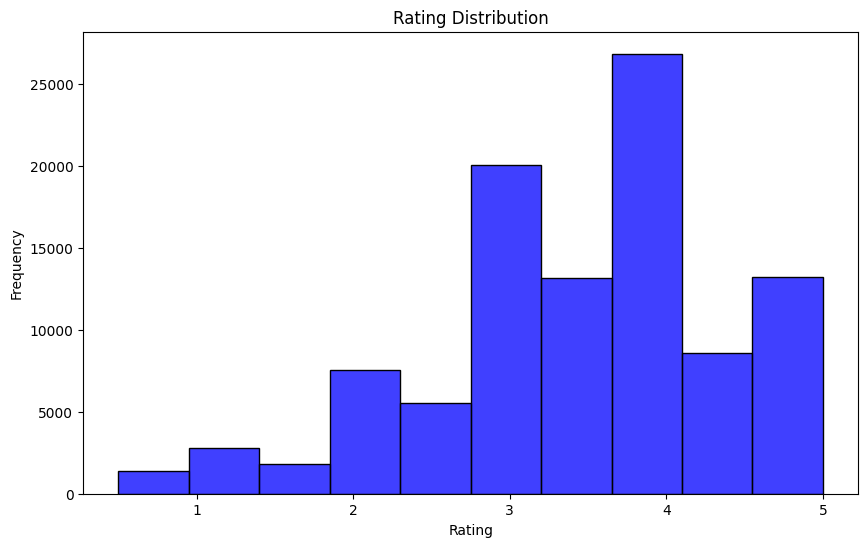

In [43]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

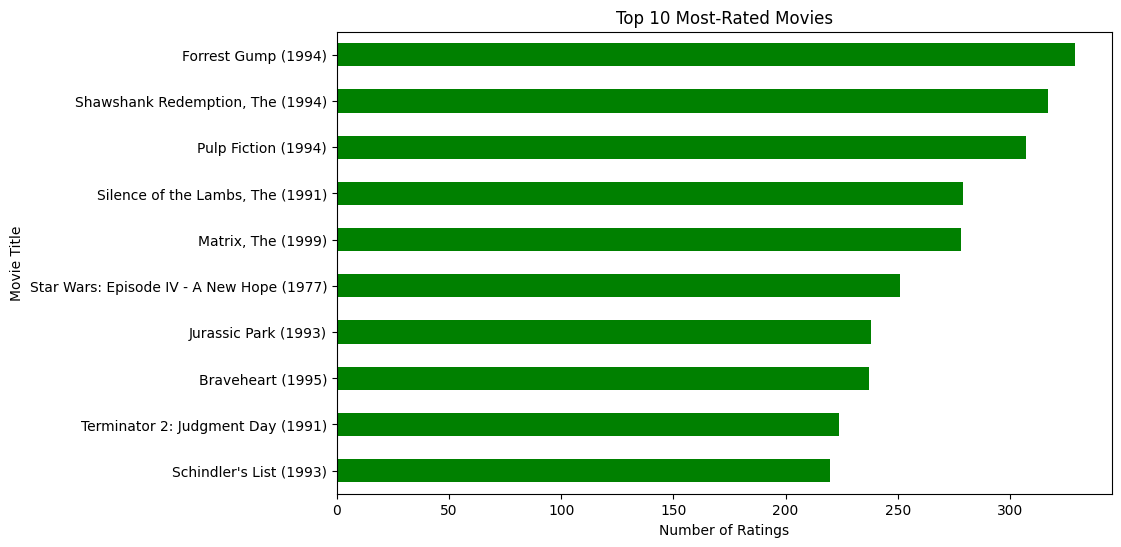

In [44]:
top_rated_movies = ratings_movies['title'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
top_rated_movies.plot(kind='barh', color='green')
plt.title("Top 10 Most-Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

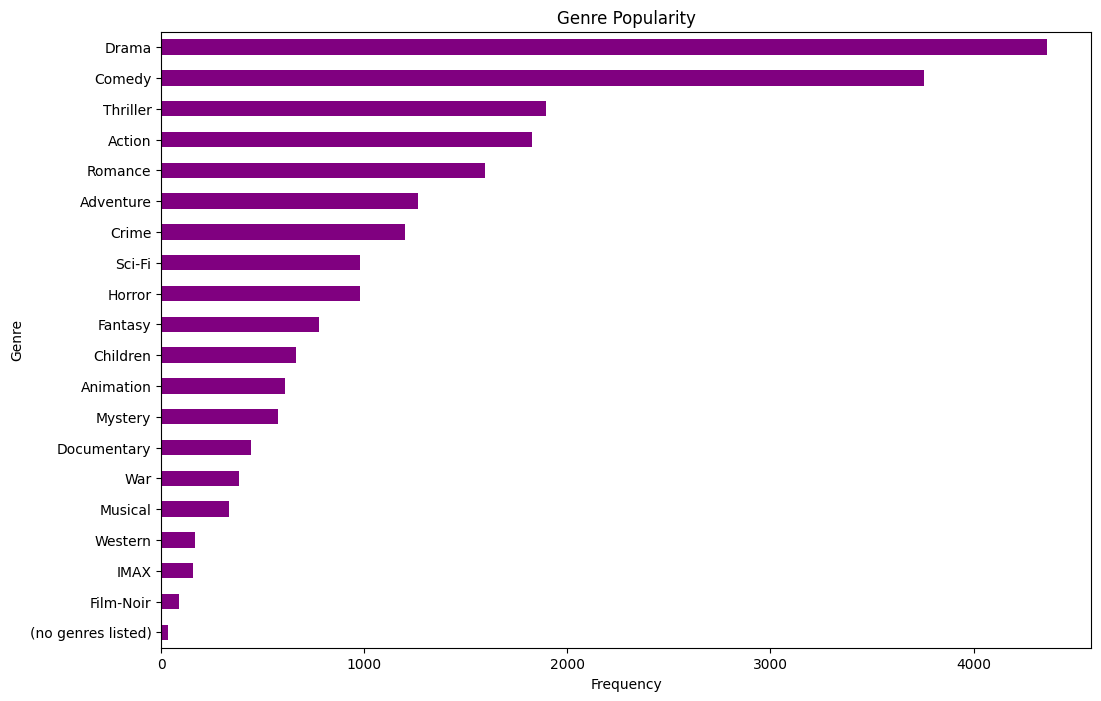

In [45]:
genre_counts = movies['genres'].str.split('|').explode().value_counts().sort_values(ascending=True)
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh', color='purple')
plt.title("Genre Popularity")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

In [46]:
print("\nCleaned and Merged Dataset:")
full_data.head()


Cleaned and Merged Dataset:


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,2000-01-01
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,No Tag,2000-01-01
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,No Tag,2000-01-01
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,2000-01-01
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,2000-01-01


# Requirement 2: Collaborative and Content-Based Filtering Models
## Tasks:

- Implement recommendation models using both collaborative filtering (user-based and item-based) and content-based filtering approaches.
- Use cosine similarity to measure similarities between users, items, and movie features.
- Content-based filtering should employ TF-IDF to analyze movie genres.
- Ensure modularity in the implementation of models for ease of comparison and potential integration into a hybrid system.

In [47]:
#Collaborative Filtering
user_movie_matrix = ratings_movies.pivot_table(index='userId', columns='title', values='rating')
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [48]:
def recommend_movies_user_based(user_id, n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:n+1]
    recommendations = user_movie_matrix.loc[similar_users].mean().sort_values(ascending=False)
    return recommendations.head(10)

print("User-Based Recommendations for User 1:")
print(recommend_movies_user_based(1))

User-Based Recommendations for User 1:
title
Ref, The (1994)                                                                5.0
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                  5.0
Dirty Work (1998)                                                              5.0
Wallace & Gromit: The Best of Aardman Animation (1996)                         5.0
Doctor Zhivago (1965)                                                          5.0
Dogma (1999)                                                                   5.0
High Plains Drifter (1973)                                                     5.0
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    5.0
Spawn (1997)                                                                   5.0
High Noon (1952)                                                               5.0
dtype: float64


In [52]:
print("User-Based Recommendations for User 52:")
print(recommend_movies_user_based(52))

User-Based Recommendations for User 52:
title
Saw (2003)                            5.0
Psycho (1960)                         5.0
RoboCop 2 (1990)                      5.0
RoboCop (1987)                        5.0
Clockwork Orange, A (1971)            5.0
Come and See (Idi i smotri) (1985)    5.0
Confessions of a Shopaholic (2009)    5.0
Pursuit of Happyness, The (2006)      5.0
Purge: Anarchy, The (2014)            5.0
Punisher, The (2004)                  5.0
dtype: float64


In [53]:
# Content-Based Filtering
vectorizer = TfidfVectorizer(token_pattern='[a-zA-Z0-9]+')
genre_matrix = vectorizer.fit_transform(movies['genres'])
genre_similarity = cosine_similarity(genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movies['title'], columns=movies['title'])
genre_similarity_df.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.813578,0.152769,0.135135,0.267586,0.0,0.152769,0.654698,0.0,0.262413,...,0.360397,0.465621,0.196578,0.516225,0.0,0.680258,0.755891,0.000000,0.421037,0.267586
Jumanji (1995),0.813578,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.804715,0.0,0.322542,...,0.000000,0.000000,0.000000,0.000000,0.0,0.341376,0.379331,0.000000,0.000000,0.000000
Grumpier Old Men (1995),0.152769,0.000000,1.000000,0.884571,0.570915,0.0,1.000000,0.000000,0.0,0.000000,...,0.162848,0.000000,0.419413,0.000000,0.0,0.181883,0.202105,0.000000,0.000000,0.570915
Waiting to Exhale (1995),0.135135,0.000000,0.884571,1.000000,0.505015,0.0,0.884571,0.000000,0.0,0.000000,...,0.144051,0.201391,0.687440,0.000000,0.0,0.160888,0.178776,0.466405,0.000000,0.505015
Father of the Bride Part II (1995),0.267586,0.000000,0.570915,0.505015,1.000000,0.0,0.570915,0.000000,0.0,0.000000,...,0.285240,0.000000,0.734632,0.000000,0.0,0.318581,0.354002,0.000000,0.000000,1.000000


In [54]:
def recommend_movies_content_based(movie_title, n=5):
    movie_idx = movies[movies['title'] == movie_title].index[0]
    similarity_scores = genre_similarity[movie_idx]
    similar_movies = sorted(list(enumerate(similarity_scores)), key=lambda x: x[1], reverse=True)[1:n+1]
    recommendations = [movies.iloc[i[0]]['title'] for i in similar_movies]
    return recommendations

print("Content-Based Recommendations for Movie 'Toy Story (1995)':")
print(recommend_movies_content_based('Toy Story (1995)'))

Content-Based Recommendations for Movie 'Toy Story (1995)':
['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Monsters, Inc. (2001)']


In [55]:
print("Content-Based Recommendations for Movie 'Sabrina (1995)':")
print(recommend_movies_content_based('Sabrina (1995)'))

Content-Based Recommendations for Movie 'Sabrina (1995)':
['Sabrina (1995)', 'Clueless (1995)', 'Two if by Sea (1996)', 'French Twist (Gazon maudit) (1995)', 'If Lucy Fell (1996)']


# Requirement 3: Hybrid Recommendation System and Evaluation
## Tasks:

- Combine the collaborative filtering and content-based filtering models into a hybrid recommendation system.
- Develop a method to provide personalized movie recommendations using the hybrid approach.
- Evaluate the performance of the recommendation system using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), and document the findings to compare model accuracy and effectiveness.

# Requirement 4 : Collaborative Filtering Using SVD with Cross-Validation (Optional)
## Tasks:

- implement collaborative filtering using Singular Value Decomposition (SVD) with the Surprise library.
- The goal is to build a recommendation model that predicts user ratings for items and evaluates the model using cross-validation.
- The process includes loading and preparing the dataset, and training the model on the full dataset for final predictions.
- Key metrics like RMSE and MAE are used to evaluate the model's accuracy. Suggest how to improve the Model Prediction

In [57]:
# Step 9: Hybrid Recommendation System

def hybrid_recommendation(user_id, movie_title, n=5):
    user_recs = recommend_movies_user_based(user_id, n=n)
    content_recs = recommend_movies_content_based(movie_title, n=n)
    hybrid_recs = pd.Series(list(set(user_recs.index) | set(content_recs)))
    return hybrid_recs.head(10)

print("Hybrid Recommendations for User 1 and Movie 'Toy Story (1995)':")
display(hybrid_recommendation(1, 'Toy Story (1995)'))

Hybrid Recommendations for User 1 and Movie 'Toy Story (1995)':


,0
0,Antz (1998)
1,Dogma (1999)
2,Wallace & Gromit: The Best of Aardman Animatio...
3,Dr. Strangelove or: How I Learned to Stop Worr...
4,"Adventures of Rocky and Bullwinkle, The (2000)"
5,Dirty Work (1998)
6,Spawn (1997)
7,Toy Story 2 (1999)
8,High Plains Drifter (1973)
9,Pirates of the Caribbean: The Curse of the Bla...


In [59]:
print("Hybrid Recommendations for User 52 and Movie 'No Game No Life: Zero (2017)':")
display(hybrid_recommendation(52, 'No Game No Life: Zero (2017)'))

Hybrid Recommendations for User 52 and Movie 'No Game No Life: Zero (2017)':


,0
0,Come and See (Idi i smotri) (1985)
1,"Punisher, The (2004)"
2,South Park: Imaginationland (2008)
3,"Clockwork Orange, A (1971)"
4,RoboCop 2 (1990)
5,Saw (2003)
6,"Purge: Anarchy, The (2014)"
7,Psycho (1960)
8,Mickey's Once Upon a Christmas (1999)
9,"Pursuit of Happyness, The (2006)"


In [62]:
# Evaluation
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

svd.fit(trainset)
predictions = svd.test(trainset.build_testset())
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print("Evaluation Results:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8743  0.8796  0.8730  0.8772  0.8675  0.8743  0.0041  
MAE (testset)     0.6724  0.6742  0.6694  0.6751  0.6667  0.6715  0.0031  
Fit time          2.60    3.24    1.39    1.44    1.42    2.02    0.76    
Test time         0.87    0.10    0.10    0.27    0.10    0.29    0.30    
RMSE: 0.6382
MAE:  0.4947
Evaluation Results:
RMSE: 0.6382488852380036
MAE: 0.49470691308519904


In [63]:
# Save Results and Summary
def save_hybrid_results():
    with open("Hybrid_Recommendation_Results.pdf", "w") as f:
        f.write("Hybrid Recommendation System Results\n")
        f.write(f"RMSE: {rmse}\n")
        f.write(f"MAE: {mae}\n")
        f.write("Recommendations and Model Design Summary\n")
    print("Results saved to Hybrid_Recommendation_Results.pdf")

save_hybrid_results()

Results saved to Hybrid_Recommendation_Results.pdf


In [64]:
def svd_cross_validation():
    with open("SVD_Improvement_Strategies.pdf", "w") as f:
        f.write("SVD Model Evaluation and Improvement Suggestions\n")
        f.write("1. Incorporate more data features like tags or genres for better predictions.\n")
        f.write("2. Apply grid search for hyperparameter tuning.\n")
        f.write("3. Implement ensemble methods to combine SVD with other algorithms.\n")
    print("Strategies saved to SVD_Improvement_Strategies.pdf")

svd_cross_validation()


Strategies saved to SVD_Improvement_Strategies.pdf
